# Assignment 1

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [27]:
# Inspect Data
data = pd.read_csv('SpotifyFeatures.csv')
data.head()



,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [95]:
#1a 
print(len(data.columns))
print(len(data))

18
232725


In [97]:
#1b
# filter data to only include pop and classical 
filtered_data = data[data['genre'].isin(['Pop', 'Classical'])]

# reset index and drop NaN values
filtered_data = filtered_data.reset_index(drop=True)

# create dummy variables, Pop = 1, Classical = 0
filtered_data['genre_dummy'] = filtered_data['genre'].map({'Pop': 1, 'Classical': 0})
# filter for only the columns we need
filtered_data = filtered_data.loc[:, ['genre_dummy', "liveness", "loudness"]]

# check the number of pop and classical songs
count_pop = len(filtered_data[filtered_data['genre_dummy'] == 1])
count_classic = len(filtered_data[filtered_data['genre_dummy'] == 0])

print("Pop songs:" + str(count_pop) + "\n" "Classical songs:" + str(count_classic))


Pop songs:9386
Classical songs:9256


In [30]:
# 1c

# create the train test split with sklearn
X = filtered_data[['liveness', 'loudness']].values 
y = filtered_data['genre_dummy'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)


Accuracy on the training set: 0.7415677596727688


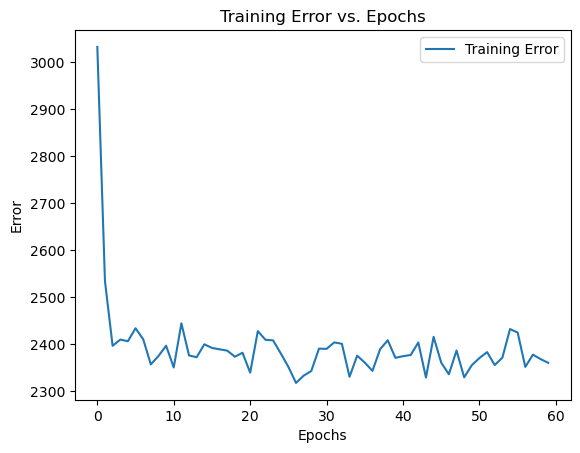

In [124]:
# 2a
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def gradient(X, y, betas):
    model = np.dot(X, betas)
    y_pred = sigmoid(model)
    error = y_pred - y  
    new_betas = np.dot(X.T, error)
    return new_betas

def sgd_logistic_regression(X, y, lr, epochs):
    n_samples, n_features = X.shape
    betas = np.ones(n_features)
    errors = [] 

    for epoch in range(epochs):
        indices = np.random.permutation(n_samples)
        epoch_error = 0

        for idx in indices:
            X_row = X[idx:idx+1]
            y_true = y[idx:idx+1]
            
            weights_gradient = gradient(X_row, y_true, betas)
            betas -= lr * weights_gradient.flatten()  
            error = y_true - sigmoid(np.dot(X_row, betas)) 
            epoch_error += abs(error)
            
        errors.append(epoch_error)
    return betas, errors




learning_rate = 0.1
epochs = 60
betas, errors = sgd_logistic_regression(X_train, y_train, learning_rate, epochs)


y_train_pred = sigmoid(np.dot(X_train, betas))
y_train_pred[y_train_pred >= 0.5] = 1
y_train_pred[y_train_pred < 0.5] = 0
accuracy = np.mean(y_train_pred == y_train)
print("Accuracy on the training set:", accuracy)

plt.plot(range(epochs), errors, label='Training Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Training Error vs. Epochs')
plt.legend()
plt.show()


In [125]:
# 2b
y_test_pred = sigmoid(np.dot(X_test, betas))
y_test_pred[y_test_pred >= 0.5] = 1
y_test_pred[y_test_pred < 0.5] = 0
accuracy_test = np.mean(y_test_pred == y_test)
print("Accuracy on the test set:", accuracy_test)


Accuracy on the test set: 0.7449718423169751


In [126]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_test_pred)

print(confusion_matrix)

[[1604  247]
 [ 704 1174]]
